##**Άσκηση 3 a)**

In [ ]:
# Make sure to upgrade to sklearn v 1.3.2
# don forget to restart the runtime if asked
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 20.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

#load the dataset
dataset = load_breast_cancer()
samples = dataset.data
labels = dataset.target

X_train, X_test, y_train, y_test = train_test_split(samples, labels, test_size = 0.3, random_state = 42)

##**Άσκηση 3 b)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#make NaN 10% of the samples from training set
missing_mask = np.random.uniform(size=X_train.shape) < 0.1
X_train_missing = X_train.copy()
X_train_missing[missing_mask] = np.nan

#train a decision tree classifier with max depth 5
classifier1 = DecisionTreeClassifier(max_depth=5)
classifier1.fit(X_train_missing, y_train)

#make predictions on the test set
predictions = classifier1.predict(X_test)

#calculate prediction accuracy
accuracy = accuracy_score(y_test, predictions)

print("Prediction accuracy for test set:", accuracy)

feature_names = np.arange(X_train_missing.shape[1])

for feature, importance in zip(feature_names, classifier1.feature_importances_):
  print(f"Feature {feature +1}: Importance = {importance:.4f}")

Prediction accuracy for test set: 0.9239766081871345
Feature 1: Importance = 0.0000
Feature 2: Importance = 0.0403
Feature 3: Importance = 0.0306
Feature 4: Importance = 0.0000
Feature 5: Importance = 0.0000
Feature 6: Importance = 0.0000
Feature 7: Importance = 0.0214
Feature 8: Importance = 0.0000
Feature 9: Importance = 0.0000
Feature 10: Importance = 0.0000
Feature 11: Importance = 0.0143
Feature 12: Importance = 0.0000
Feature 13: Importance = 0.0000
Feature 14: Importance = 0.0106
Feature 15: Importance = 0.0000
Feature 16: Importance = 0.0204
Feature 17: Importance = 0.0000
Feature 18: Importance = 0.0000
Feature 19: Importance = 0.0000
Feature 20: Importance = 0.0000
Feature 21: Importance = 0.0000
Feature 22: Importance = 0.0011
Feature 23: Importance = 0.0153
Feature 24: Importance = 0.2030
Feature 25: Importance = 0.0109
Feature 26: Importance = 0.0039
Feature 27: Importance = 0.0000
Feature 28: Importance = 0.6282
Feature 29: Importance = 0.0000
Feature 30: Importance = 0.0

##**Άσκηση 3 c)**

In [ ]:
#create an empty list to store all classifiers
classifiers = []

#define the number of trees
num_classifiers = 100

#train every tree to manually create a forest without bootstraping on training data
for _ in range(num_classifiers):
    #select random features
    selected_features = np.random.choice(X_train_missing.shape[1], size=5, replace=False)

    #use all samples with the selected features
    X_train_subset = X_train_missing[:, selected_features]

    #train a decision tree classifier with max depth 3
    clf = DecisionTreeClassifier(max_depth=3)
    clf.fit(X_train_subset, y_train)

    #append the classifier to the list
    classifiers.append((clf, selected_features))

#make predictions on the test set using each classifier
predictions = np.zeros((X_test.shape[0], num_classifiers))

total_feature_importances = np.zeros(X_train_missing.shape[1])

nan_importance_counts = np.zeros(X_train_missing.shape[1])

for i, (clf, selected_features) in enumerate(classifiers):
    X_test_subset = X_test[:, selected_features]
    predictions[:, i] = clf.predict(X_test_subset)
    importance_values = clf.feature_importances_

    #count NaN values for each feature and replace them with 0
    nan_counts = np.isnan(importance_values)
    nan_importance_counts[selected_features] += nan_counts

    importance_values[nan_counts] = 0

    total_feature_importances[selected_features] += importance_values

#perform majority voting to determine the final class
final_predictions = np.mean(predictions, axis=1) >= 0.5
test_a = final_predictions
final_predictions = final_predictions.astype(int)
test_b = final_predictions

#calculate prediction accuracy
accuracy = accuracy_score(y_test, final_predictions)

print("Prediction accuracy for test set:", accuracy)

#calculate average feature importances based on non-NaN values
average_feature_importances = total_feature_importances / (num_classifiers-nan_importance_counts)
normalized_feature_importances = average_feature_importances / np.sum(average_feature_importances)
feature_names = np.arange(X_train_missing.shape[1])

for feature, importance in zip(feature_names, normalized_feature_importances):
    print(f"Feature {feature + 1}: Importance = {importance:.4f}")

Prediction accuracy for test set: 0.9649122807017544
Feature 1: Importance = 0.0415
Feature 2: Importance = 0.0121
Feature 3: Importance = 0.0446
Feature 4: Importance = 0.0699
Feature 5: Importance = 0.0051
Feature 6: Importance = 0.0125
Feature 7: Importance = 0.0665
Feature 8: Importance = 0.0720
Feature 9: Importance = 0.0033
Feature 10: Importance = 0.0026
Feature 11: Importance = 0.0246
Feature 12: Importance = 0.0006
Feature 13: Importance = 0.0263
Feature 14: Importance = 0.0284
Feature 15: Importance = 0.0039
Feature 16: Importance = 0.0021
Feature 17: Importance = 0.0014
Feature 18: Importance = 0.0049
Feature 19: Importance = 0.0012
Feature 20: Importance = 0.0036
Feature 21: Importance = 0.0594
Feature 22: Importance = 0.0188
Feature 23: Importance = 0.1288
Feature 24: Importance = 0.0911
Feature 25: Importance = 0.0135
Feature 26: Importance = 0.0284
Feature 27: Importance = 0.0513
Feature 28: Importance = 0.1692
Feature 29: Importance = 0.0091
Feature 30: Importance = 0.0

##**Άσκηση 3 e)**

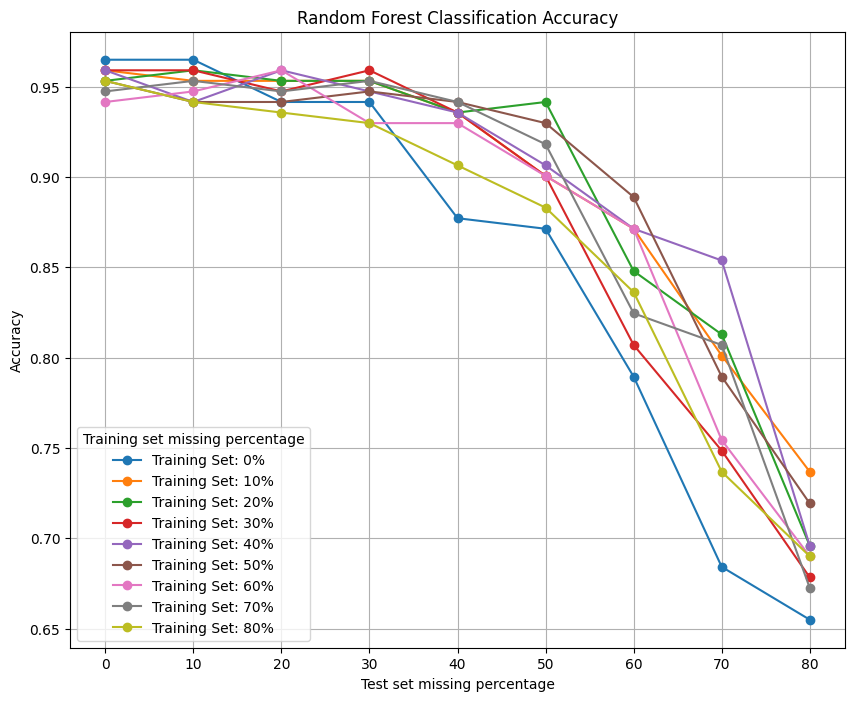

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#create an empty list to store classification accuracies
all_accuracies = []

#varying missing values in the training set from 0% to 80% in steps of 10%
for train_missing_percentage in range(0, 81, 10):
    #create an empty list to store classification accuracies for each training set missing value
    accuracies = []

    #varying missing values in the test set from 0% to 80% in steps of 10%
    for test_missing_percentage in range(0, 81, 10):
        #introduce missing values to the training set
        train_missing_mask = np.random.uniform(size=X_train.shape) < train_missing_percentage / 100
        X_train_with_missing = X_train.copy()
        X_train_with_missing[train_missing_mask] = np.nan

        #train the random forest
        classifiers = []
        num_classifiers = 100
        num_features = 5
        max_depth = 3

        for _ in range(num_classifiers):
            selected_features = np.random.choice(X_train_with_missing.shape[1], size=num_features, replace=False)
            X_train_subset = X_train_with_missing[:, selected_features]
            clf = DecisionTreeClassifier(max_depth=max_depth)
            clf.fit(X_train_subset, y_train)
            classifiers.append((clf, selected_features))

        #introduce missing values to the test set
        test_missing_mask = np.random.uniform(size=X_test.shape) < test_missing_percentage / 100
        X_test_with_missing = X_test.copy()
        X_test_with_missing[test_missing_mask] = np.nan

        #make predictions on the test set using each classifier
        predictions = np.zeros((X_test.shape[0], num_classifiers))

        for i, (clf, selected_features) in enumerate(classifiers):
            X_test_subset = X_test_with_missing[:, selected_features]
            predictions[:, i] = clf.predict(X_test_subset)

        #perform majority voting to determine the final class
        final_predictions = np.mean(predictions, axis=1) >= 0.5
        final_predictions = final_predictions.astype(int)

        #calculate prediction accuracy
        accuracy = accuracy_score(y_test, final_predictions)
        accuracies.append(accuracy)

    #append accuracies for this training set missing value to the list
    all_accuracies.append((train_missing_percentage, accuracies))

#plotting all curves on a single diagram
plt.figure(figsize=(10, 8))

for train_missing_percentage, accuracies in all_accuracies:
    plt.plot(range(0, 81, 10), accuracies, marker='o', label=f'Training Set: {train_missing_percentage}%')

#adding labels and legend to the plot
plt.title('Random Forest Classification Accuracy')
plt.xlabel('Test set missing percentage')
plt.ylabel('Accuracy')
plt.legend(title='Training set missing percentage', loc='lower left')
plt.grid(True)

#display the plot
plt.show()


##**Άσκηση 3 f)**

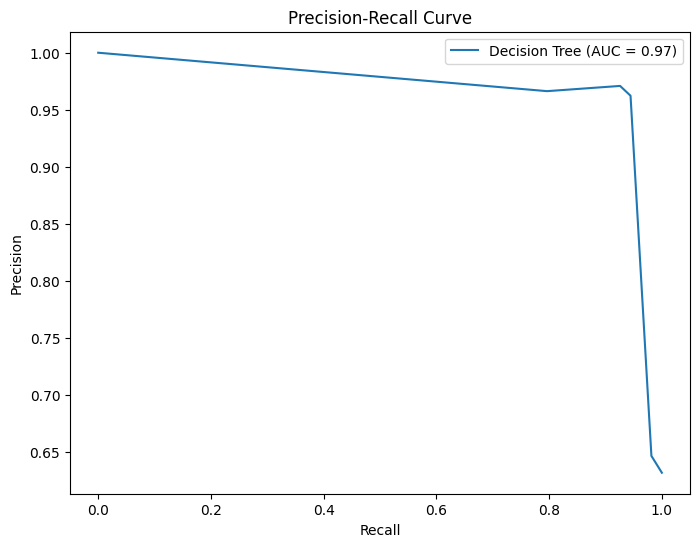

In [ ]:
#Tree Classifier
from sklearn.metrics import precision_recall_curve, auc

#make NaN 10% of the samples from training set
missing_mask = np.random.uniform(size=X_train.shape) < 0.1
X_train_missing = X_train.copy()
X_train_missing[missing_mask] = np.nan

#train a decision tree classifier with max depth 5
classifier1 = DecisionTreeClassifier(max_depth=5)
classifier1.fit(X_train_missing, y_train)

probabilities = classifier1.predict_proba(X_test)[:, 1]

#calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

#calculate area under the curve (AUC) for precision-recall curve
auc_score = auc(recall, precision)

#plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Decision Tree (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

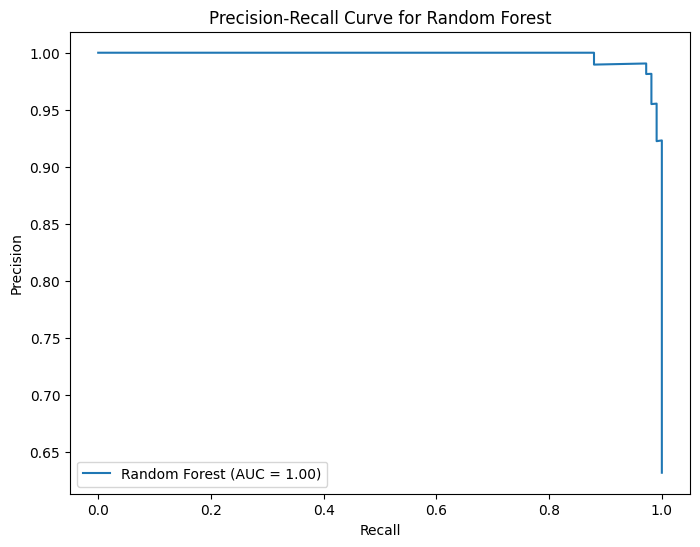

In [ ]:
#Random Forest

#create an empty list to store all classifiers
classifiers = []

#define the number of trees
num_classifiers = 100

#train every tree to manually create a forest without bootstraping on training data
for _ in range(num_classifiers):
    #select random features
    selected_features = np.random.choice(X_train_missing.shape[1], size=5, replace=False)

    #use all samples with the selected features
    X_train_subset = X_train_missing[:, selected_features]

    #train a decision tree classifier with max depth 3
    clf = DecisionTreeClassifier(max_depth=3)
    clf.fit(X_train_subset, y_train)

    #append the classifier to the list
    classifiers.append((clf, selected_features))

#make predictions on the test set using each classifier
probabilities = np.zeros((X_test.shape[0], num_classifiers))

for i, (clf, selected_features) in enumerate(classifiers):
    X_test_subset = X_test[:, selected_features]
    #get the probability estimation for class 1
    probabilities[:, i] = clf.predict_proba(X_test_subset)[:, 1]

#find the average for the probabilities from all classifiers
final_probabilities = np.mean(probabilities, axis=1)

#calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, final_probabilities)

#calculate area under the curve (AUC) for precision-recall curve
auc_score = auc(recall, precision)

#plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend()
plt.show()